#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [ ]:
X=###
Y=###
###행으로 병합 코드
###열로 병합 코드

linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [2]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 723 kB/s 
     |████████████████████████████████| 9.9 MB 53.9 MB/s 
     |████████████████████████████████| 11.2 MB 46.5 MB/s 
     |████████████████████████████████| 61 kB 3.9 MB/s 
     |████████████████████████████████| 15.7 MB 53.4 MB/s 
     |████████████████████████████████| 944 kB 72.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [112]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [139]:
def synthetic_data(w, b, num_examples): # 실제 y값을 y_hat값을 바탕으로 generate해주는 함수
    """Generate y = Xw + b + noise."""
    X = torch.normal(mean=0, std=1, size=(num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [140]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.3526,  0.6734]) 
label: tensor([3.4327])


In [141]:
def data_iter(batch_size, features, labels): # batch_size 만큼의 실제로 나올법한 DATASET를 generate해주는 함수
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [142]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.1459, -1.0139],
        [-0.0161, -0.6520],
        [-0.4504,  2.2212],
        [ 1.3253, -0.1485],
        [-1.4611, -0.4157],
        [ 2.3509,  0.4125],
        [ 0.7067, -0.0822],
        [ 0.2992, -0.4888],
        [ 1.3108,  1.5158],
        [-0.8468, -0.9509],
        [ 0.4560, -0.0386],
        [ 0.1856, -0.0145],
        [ 0.2079,  0.3314],
        [-0.8232,  0.4432],
        [-0.7040,  1.0661],
        [ 0.8609,  1.6539],
        [ 0.9314,  0.6038],
        [-1.7859,  0.6999],
        [-0.2868,  0.6864],
        [-0.7502,  0.5948]]) 
 tensor([[ 7.4518],
        [ 6.4428],
        [ 0.8073],
        [ 9.6919],
        [ 1.7670],
        [11.9200],
        [ 7.7354],
        [ 7.1473],
        [ 7.1654],
        [ 4.3883],
        [ 6.9191],
        [ 6.0881],
        [ 5.6301],
        [ 2.3611],
        [ 1.7821],
        [ 5.5911],
        [ 7.3728],
        [-0.9077],
        [ 3.5994],
        [ 2.3673]])


In [143]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [144]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w)+b

In [145]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat-y.reshape(y_hat.shape))**2/2 # rehape함수로 y_hat와 y의 차원을 맞춰준다.

In [146]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad(): # 이 컨텍스트 내부에 생성된 텐서들은 requires_grad=False 상태가 되어, 메모리 사용량을 아껴준다.
      for param in params:
        param -= lr * param.grad / batch_size
        param.grad.zero_()

In [147]:
batch_size = 20
lr = 0.02 # learning rate
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs): # backward propagation을 통해 loss를 update해준다.
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) # loss function compute
        l.sum().backward() # backwards()는 단일 gradient값을 받아서 bp해주는다. 여러입력/ 여러출력으로 mapping되는 경우 매개변수당 여러 gradient가 mapping되므로 sum()해준다.
        sgd([w,b], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}, b {b}')

epoch 1, loss 0.375175, b tensor([4.7938], requires_grad=True)
epoch 2, loss 0.007248, b tensor([5.4080], requires_grad=True)
epoch 3, loss 0.000195, b tensor([5.4880], requires_grad=True)
epoch 4, loss 0.000054, b tensor([5.4986], requires_grad=True)
epoch 5, loss 0.000052, b tensor([5.4998], requires_grad=True)
epoch 6, loss 0.000052, b tensor([5.4999], requires_grad=True)
epoch 7, loss 0.000052, b tensor([5.5001], requires_grad=True)
epoch 8, loss 0.000052, b tensor([5.4999], requires_grad=True)
epoch 9, loss 0.000052, b tensor([5.5001], requires_grad=True)
epoch 10, loss 0.000052, b tensor([5.4999], requires_grad=True)


In [122]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0001, -0.0001], grad_fn=<SubBackward0>)
error in estimating b: tensor([-7.7248e-05], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

epoch 1, loss 0.101066, b 5.5
epoch 2, loss 0.001878, b 5.5
epoch 3, loss 0.000083, b 5.5
epoch 4, loss 0.000051, b 5.5
epoch 5, loss 0.000051, b 5.5
epoch 6, loss 0.000051, b 5.5
epoch 7, loss 0.000051, b 5.5
epoch 8, loss 0.000051, b 5.5
epoch 9, loss 0.000051, b 5.5
epoch 10, loss 0.000051, b 5.5


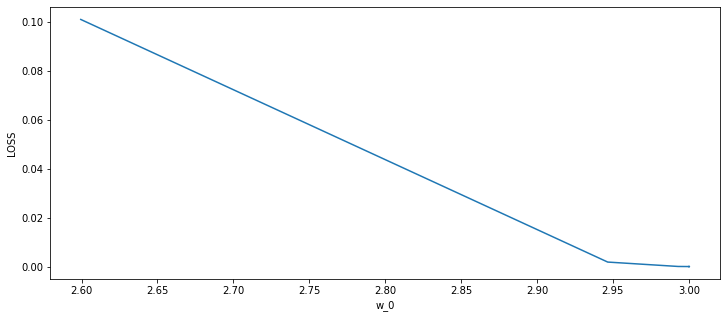

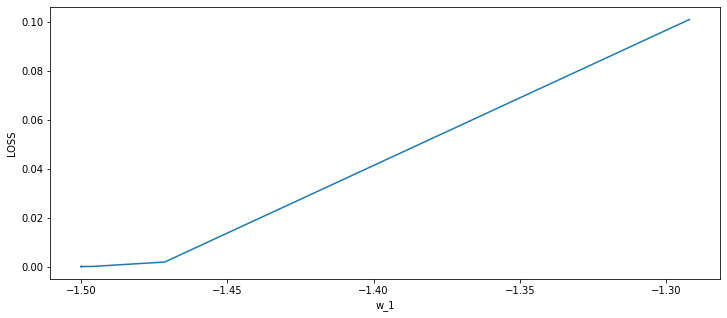

In [137]:
import matplotlib.pyplot as plt
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([5.5]) # 윗셀에서 b는 5.5로 수렴하는 것을 보였기에 b를 5.5로 고정
w_0 = []
w_1 = []
loss_ = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y)
        l.sum().backward()
        sgd([w], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}, b {b.tolist()[0]}')
        w_0.append(w.tolist()[0][0])
        w_1.append(w.tolist()[1][0])
        loss_.append(train_l.mean())

fig = plt.figure(figsize=(12,5))
plt.ylabel('LOSS')
plt.xlabel('w_0')
plt.plot(w_0,loss_)
plt.show()
fig = plt.figure(figsize=(12,5))
plt.ylabel('LOSS')
plt.xlabel('w_1')
plt.plot(w_1,loss_)
plt.show()

concise implementation of linear regression 
- api 사용해보기

In [96]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [97]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [98]:
next(iter(data_iter))

[tensor([[-0.5632,  2.0103],
         [ 0.5771,  0.0633],
         [ 0.8306,  1.2253],
         [-0.4726,  0.4130],
         [ 0.9171,  0.7118],
         [ 1.5311,  0.7148],
         [-0.1505, -0.9120],
         [ 0.5147, -2.2424],
         [ 1.9544, -0.6904],
         [ 0.4121,  1.5132],
         [ 0.2811, -0.3328],
         [ 0.6086, -0.7600],
         [ 1.3664,  1.1844],
         [-1.6706,  0.0807],
         [ 2.1215,  2.4678],
         [-0.7407, -0.8839],
         [ 1.4646,  0.2864],
         [ 1.3986, -0.7450],
         [-1.4961,  0.4453],
         [ 0.9842, -0.6181]]), tensor([[ 0.8093],
         [ 7.1521],
         [ 6.1409],
         [ 3.4602],
         [ 7.1655],
         [ 9.0047],
         [ 6.4364],
         [10.4279],
         [12.3969],
         [ 4.4783],
         [ 6.8436],
         [ 8.4727],
         [ 7.8509],
         [ 0.3473],
         [ 8.1551],
         [ 4.6003],
         [ 9.4378],
         [10.8191],
         [ 0.3475],
         [ 9.3731]])]

In [99]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [100]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [101]:
loss = nn.MSELoss()

In [102]:
trainer = torch.optim.SGD(net.parameters(), lr=0.02)

In [103]:
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.010785
epoch 2, loss 0.000100
epoch 3, loss 0.000097
epoch 4, loss 0.000097
epoch 5, loss 0.000097
epoch 6, loss 0.000098
epoch 7, loss 0.000097
epoch 8, loss 0.000097
epoch 9, loss 0.000097
epoch 10, loss 0.000097


In [104]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-3.6955e-05, -4.7874e-04])
error in estimating b: tensor([2.0027e-05])
